In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json('retention.json').transpose()
df.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 54030 non-null  object
 1   age                    54030 non-null  object
 2   gross_income           54030 non-null  object
 3   segment                54030 non-null  object
 4   num_credit_cards       54030 non-null  object
 5   tiprel_1mes            54030 non-null  object
 6   ind_actividad_cliente  54030 non-null  object
 7   num_Products           54030 non-null  object
 8   num_loans              54030 non-null  object
 9   duration               54030 non-null  object
dtypes: object(10)
memory usage: 6.6+ MB


In [4]:
df.describe()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
count,54030,54030,54030,54030,54030,54030,54030,54030,54030,54030
unique,2,110,49994,3,2,2,2,14,2,5677
top,F,23 years,$ 451931.22,Individuals,0,I,0,1,0,716
freq,29681,3080,29,32607,51335,29026,28686,27817,53524,226


### Initial Observations:
    
- 1. There are no null values, will anyways double check it while working through each column
- 2. Have to clean up the age column
- 3. Must remove the $ from gross income
- 4. Change data types of some columns

----------------

## Working through each column

### Gender Column

In [5]:
df.gender.unique()

array(['M', 'F'], dtype=object)

In [6]:
df.gender.isnull().sum()

0

In [7]:
df.gender.describe()

count     54030
unique        2
top           F
freq      29681
Name: gender, dtype: object

#### 1. Unique values - 2
#### 2. Null values - 0

### Age Column

In [8]:
df.age.unique()

array(['21 years', '23 years', '24 years', '31 years', '32 years',
       '43 years', '48 years', '36 years', '26 years', '46 years',
       '42 years', '22 years', '33 years', '40 years', '60 years',
       '25 years', '45 years', '34 years', '30 years', '54 years',
       '20 years', '39 years', '52 years', '66 years', '89 years',
       '61 years', '71 years', '69 years', '53 years', '18 years',
       '44 years', '70 years', '72 years', '27 years', '64 years',
       '28 years', '73 years', '57 years', '38 years', '78 years',
       '68 years', '56 years', '50 years', '87 years', '51 years',
       '84 years', '67 years', '37 years', '35 years', '63 years',
       '47 years', '49 years', '29 years', '58 years', '74 years',
       '85 years', '86 years', '88 years', '62 years', '83 years',
       '59 years', '55 years', '75 years', '41 years', '80 years',
       '14 years', '65 years', '76 years', '97 years', '15 years',
       '82 years', '77 years', '98 years', '81 years', '90 yea

In [9]:
df.age.isnull().sum()

0

#### We have to chop 'years' from each entry, no null values are present. Convert it to integer type

In [10]:
df['age'] = df['age'].apply(lambda x: x.split(' ')[0]).astype('int')

In [11]:
df.age.describe()

count    54030.000000
mean        40.772534
std         17.210781
min          2.000000
25%         25.000000
50%         40.000000
75%         51.000000
max        112.000000
Name: age, dtype: float64

### Gross Income Column

In [12]:
df.gross_income.unique()

array(['$ 79070.91', '$ 178270.68', '$ 31243.56', ..., '$ 106930.05',
       '$ 65246.79', '$ 180678.48'], dtype=object)

In [13]:
df.gross_income.isnull().sum()

0

#### We have to remove the dollar sign from every entry, no null values. Convert it to float type

In [14]:
df['gross_income'] = df['gross_income'].apply(lambda x: x.split(' ')[1]).astype('float')

In [15]:
df['gross_income'].describe().apply(lambda x: format(x, 'f'))

count       54030.000000
mean       134196.672404
std        239721.455090
min          2336.010000
25%         68581.072500
50%        101566.320000
75%        156253.755000
max      28894395.510000
Name: gross_income, dtype: object

### Segment Column

In [16]:
df.segment.unique()

array(['Individuals', 'College_Graduated', 'VIP'], dtype=object)

In [17]:
df.segment.isnull().sum()

0

In [18]:
df.segment.describe()

count           54030
unique              3
top       Individuals
freq            32607
Name: segment, dtype: object

#### No null values are present, we can leave things as it is.

### Num_Credit_Cards Column

In [19]:
df.num_credit_cards.unique()

array([0, 1], dtype=object)

In [20]:
df.num_credit_cards.isnull().sum()

0

In [21]:
df.num_credit_cards.describe()

count     54030
unique        2
top           0
freq      51335
Name: num_credit_cards, dtype: int64

#### No null values are present, we can leave things as it is. Need to change it to int type

In [22]:
df['num_credit_cards'] = df['num_credit_cards'].astype('int')

### tiprel_1mes Column

In [23]:
df.tiprel_1mes.unique()

array(['I', 'A'], dtype=object)

In [24]:
df.tiprel_1mes.isnull().sum()

0

In [25]:
df.tiprel_1mes.describe()

count     54030
unique        2
top           I
freq      29026
Name: tiprel_1mes, dtype: object

#### No null values are present, we can leave things as it is.

### ind_actividad_cliente Column

In [26]:
df['ind_actividad_cliente'].unique()

array([0, 1], dtype=object)

In [27]:
df['ind_actividad_cliente'].isnull().sum()

0

#### No null values are present, we can leave things as it is. Need to change it to int type

In [28]:
df['ind_actividad_cliente'] = df['ind_actividad_cliente'].astype('int')

In [29]:
df['ind_actividad_cliente'].describe()

count    54030.000000
mean         0.469073
std          0.499047
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ind_actividad_cliente, dtype: float64

### num_Products Column

In [30]:
df['num_Products'].unique()

array([1, 0, 4, 2, 7, 3, 5, 6, 9, 8, 10, 12, 11, 13], dtype=object)

In [31]:
df['num_Products'].isnull().sum()

0

#### No null values are present, we can leave things as it is. Need to change it to int type

In [32]:
df['num_Products'] = df['num_Products'].astype('int')

In [33]:
df['num_Products'].describe()

count    54030.000000
mean         1.536017
std          1.578848
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: num_Products, dtype: float64

### num_loans Column

In [34]:
df['num_loans'].unique()

array([0, 1], dtype=object)

In [35]:
df['num_loans'].isnull().sum()

0

#### No null values are present, we can leave things as it is. Need to change it to int type

In [36]:
df['num_loans'] = df['num_loans'].astype('int')

In [37]:
df['num_loans'].describe()

count    54030.000000
mean         0.009365
std          0.096320
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_loans, dtype: float64

### duration Column

In [38]:
df['duration'].unique()

array([1035, 1097, 1866, ..., 7382, 7509, 6981], dtype=object)

In [39]:
df['duration'].isnull().sum()

0

#### No null values are present, we can leave things as it is. Need to change it to int type

In [40]:
df['duration'] = df['duration'].astype('int')

In [41]:
df['duration'].describe()

count    54030.000000
mean      2913.936665
std       2027.956268
min        366.000000
25%       1118.000000
50%       2039.500000
75%       4693.000000
max       7909.000000
Name: duration, dtype: float64

 ---------------------------------------------------------

----------------------------------------------------

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

--------------

### 1. For people who were inactive at the start of the study and were active by the time the study ended, is there a pattern in terms of age and gender?

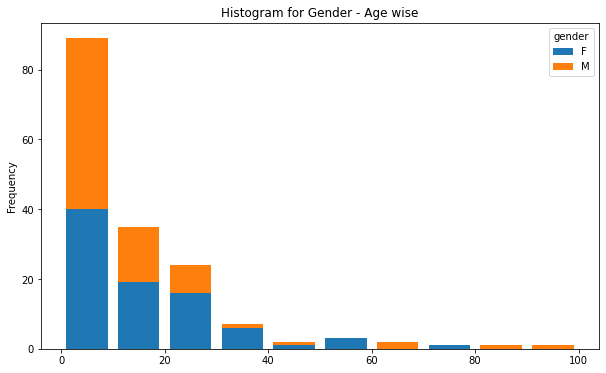

In [43]:
df[(df['tiprel_1mes'] == 'I') & (df['ind_actividad_cliente'] == 1)].groupby(['age','gender']).size().unstack().plot(kind='hist',stacked=True, bins=[0,10,20,30,40,50,60,70,80,90,100], rwidth=0.8, figsize=(10,6));
plt.title("Histogram for Gender - Age wise");

#### Yes, there is a pattern. 
- Between the age 1 - 20 yrs - Both the genders were equally inactive at the start of the study and were active by the time the study ended


- Between the age 21 - 60 yrs - Female were more compared to Male


- Between the age 61 - 100 yrs+ - Male were more compared to Female


 -------------------------

----------------------

### 2. Do people with more than average annual income tend to have relatively high activity rates compared to people with less than average annual income?

In [44]:
df.loc[(df['gross_income'] >= 134196) & (df['num_credit_cards'] == 1)].shape

(1216, 10)

In [45]:
df.loc[(df['gross_income'] <= 134196) & (df['num_credit_cards'] == 1)].shape

(1479, 10)

#### The company has issued more number of credit cards (through cross sell) to customers whose annual income was less than average.

In [46]:
df.loc[(df['gross_income'] >= 134196) & (df['num_Products'] >= 1)].shape

(14482, 10)

In [47]:
df.loc[(df['gross_income'] <= 134196) & (df['num_Products'] >= 1)].shape

(29975, 10)

#### Customers whose annual income was lesser than average has purchased more financial products (through cross sell)

In [48]:
df.loc[(df['gross_income'] >= 134196) & (df['num_loans'] == 1)].shape

(165, 10)

In [49]:
df.loc[(df['gross_income'] <= 134196) & (df['num_loans'] == 1)].shape

(341, 10)

#### More loans were disbursed to the customers (through cross sell) whose annual income was lesser than average

---------------------------------------

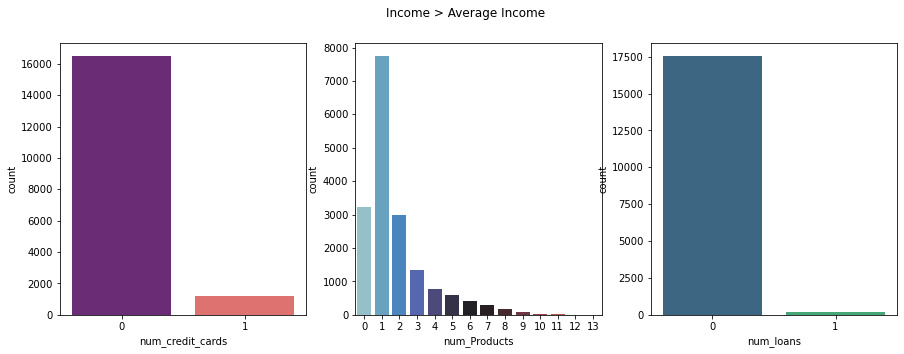

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot((df.loc[(df['gross_income'] >= 134196)].num_credit_cards), ax=axes[0], palette='magma')
sns.countplot((df.loc[(df['gross_income'] >= 134196)].num_Products), ax=axes[1], palette='icefire')
sns.countplot((df.loc[(df['gross_income'] >= 134196)].num_loans), ax=axes[2], palette='viridis')
plt.suptitle("Income > Average Income")
plt.show()

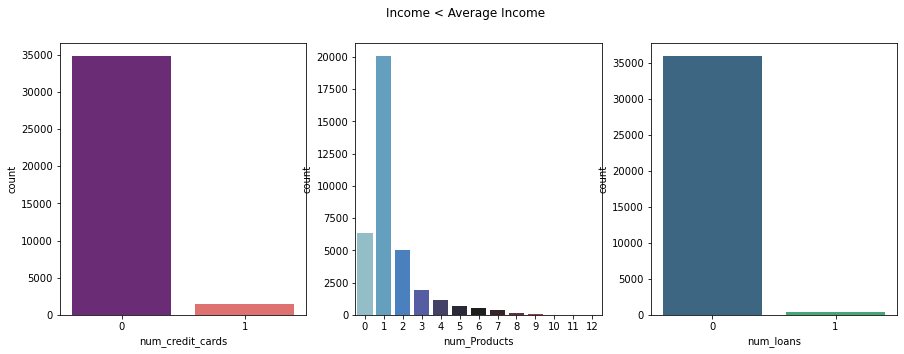

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot((df.loc[(df['gross_income'] <= 134196)].num_credit_cards), ax=axes[0], palette='magma')
sns.countplot((df.loc[(df['gross_income'] <= 134196)].num_Products), ax=axes[1], palette='icefire')
sns.countplot((df.loc[(df['gross_income'] <= 134196)].num_loans), ax=axes[2], palette='viridis')
plt.suptitle("Income < Average Income")
plt.show()

------------------

-----------------

### 3. What is the relationship between the number of products owned by customers who were active at the start and at the end vs those who were active at the start but were inactive at the end of the study period

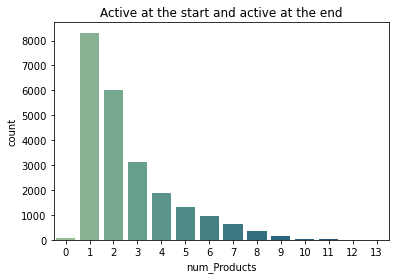

In [52]:
sns.countplot(df.loc[(df['tiprel_1mes'] == 'A') & (df['ind_actividad_cliente'] == 1)].num_Products, palette='crest');
plt.title("Active at the start and active at the end");

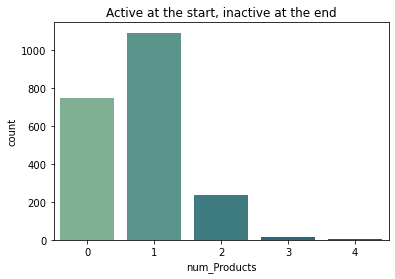

In [53]:
sns.countplot(df.loc[(df['tiprel_1mes'] == 'A') & (df['ind_actividad_cliente'] == 0)].num_Products, palette='crest');
plt.title("Active at the start, inactive at the end");

### Inference

##### Customers who were active at the start and at the end:
   -   Max number of products purchased by a single customer is 13
   -   81 customers purchased 10 or more than 10 products 
   -   99% of the customers (22835 customers) purchased atleast 1 product.



##### Customers who were active at the start and inactive at the end:
 -  Did not purchase more than 4 products
 -  87% of the customers either did not purchase any product or purchase only one product

----------------

-----------------

### 4. How people who display consistent behaviour (active at start and active at end,inactive at start and inactive at end) differ from people who display a change in theirbehaviour (active at start but inactive at the end or inactive at start but active atend)?

In [54]:
#Consistent Behaviour
consistentdf = df.loc[((df['tiprel_1mes'] == 'A') & (df['ind_actividad_cliente'] == 1)) | (df['tiprel_1mes'] == 'I') & (df['ind_actividad_cliente'] == 0)]

In [55]:
#Inconsistent Behaviour
inconsistentdf = df.loc[((df['tiprel_1mes'] == 'A') & (df['ind_actividad_cliente'] == 0)) | (df['tiprel_1mes'] == 'I') & (df['ind_actividad_cliente'] == 1)]

In [56]:
consistentdf.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
age,49494.00000,40.65545,17.09751,2.00000,25.00000,39.00000,51.00000,112.00000
gross_income,49494.00000,134789.65633,248092.94610,2336.01000,68712.24000,101729.50500,156720.05250,28894395.51000
num_credit_cards,49494.00000,0.05409,0.22619,0.00000,0.00000,0.00000,0.00000,1.00000
ind_actividad_cliente,49494.00000,0.46280,0.49862,0.00000,0.00000,0.00000,1.00000,1.00000
num_Products,49494.00000,1.58084,1.63027,0.00000,1.00000,1.00000,2.00000,13.00000
num_loans,49494.00000,0.00972,0.09810,0.00000,0.00000,0.00000,0.00000,1.00000
duration,49494.00000,2905.25696,2017.98706,366.00000,1131.00000,2025.00000,4654.00000,7909.00000


In [57]:
consistentdf.describe(include=object).transpose()

,count,unique,top,freq
gender,49494,2,F,27112
segment,49494,3,Individuals,29607
tiprel_1mes,49494,2,I,26588


In [58]:
inconsistentdf.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
age,4536.00000,42.05004,18.35497,2.00000,25.00000,41.00000,53.00000,105.00000
gross_income,4536.00000,127726.40208,113425.11628,9049.62000,67465.80750,99893.04000,152412.08250,3227686.95000
num_credit_cards,4536.00000,0.00397,0.06288,0.00000,0.00000,0.00000,0.00000,1.00000
ind_actividad_cliente,4536.00000,0.53748,0.49865,0.00000,0.00000,1.00000,1.00000,1.00000
num_Products,4536.00000,1.04696,0.65658,0.00000,1.00000,1.00000,1.00000,4.00000
num_loans,4536.00000,0.00551,0.07404,0.00000,0.00000,0.00000,0.00000,1.00000
duration,4536.00000,3008.64418,2131.64643,366.00000,1073.00000,2310.50000,5039.00000,7879.00000


In [59]:
inconsistentdf.describe(include=object).transpose()

,count,unique,top,freq
gender,4536,2,F,2569
segment,4536,3,Individuals,3000
tiprel_1mes,4536,2,I,2438


#### Inference


 - The max age of a consistent customer is 112 whereas the max the age of an inconsistent customer is 105.
 - The diff between the minimum gross income of consistent customer and minimum gross income of inconsistent customer is $6713 
 - The max purchase of a consistent customer is 14 whereas the max the purchase of an inconsistent customer is just 4.

----------------------

----------------

### 5. Generate elaborate profiles for the following four groups:
- a. Active at the start but inactive at the end
- b. Active at the start and active by the end
- c. Inactive at the start but active at the end
- d. Inactive at the start and inactive at the end

In [60]:
#Active in the beginning, Active at the end
AA = df.loc[((df['tiprel_1mes'] == 'A') & (df['ind_actividad_cliente'] == 1))]

In [61]:
AA.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
age,22906.00000,43.67712,16.06504,2.00000,32.00000,43.00000,52.00000,112.00000
gross_income,22906.00000,142333.73373,222933.48348,5340.93000,74152.50750,110413.96500,167160.34500,13268621.28000
num_credit_cards,22906.00000,0.11678,0.32117,0.00000,0.00000,0.00000,0.00000,1.00000
ind_actividad_cliente,22906.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000
num_Products,22906.00000,2.58063,1.87933,0.00000,1.00000,2.00000,3.00000,13.00000
num_loans,22906.00000,0.02100,0.14338,0.00000,0.00000,0.00000,0.00000,1.00000
duration,22906.00000,3304.76910,2128.15378,366.00000,1203.00000,3202.00000,5266.00000,7909.00000


In [62]:
AA.describe(include=object).transpose()

,count,unique,top,freq
gender,22906,2,F,13357
segment,22906,3,Individuals,15773
tiprel_1mes,22906,1,A,22906


-------------

In [63]:
#Active in the beginning, Inactive at the end
AI = df.loc[((df['tiprel_1mes'] == 'A') & (df['ind_actividad_cliente'] == 0))]

In [64]:
AI.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
age,2098.00000,44.72355,18.80053,5.00000,27.00000,44.00000,56.00000,104.00000
gross_income,2098.00000,133109.92583,132864.38345,14135.61000,68242.50000,103546.15500,155856.83250,3227686.95000
num_credit_cards,2098.00000,0.00667,0.08143,0.00000,0.00000,0.00000,0.00000,1.00000
ind_actividad_cliente,2098.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
num_Products,2098.00000,0.77931,0.68738,0.00000,0.00000,1.00000,1.00000,4.00000
num_loans,2098.00000,0.01192,0.10853,0.00000,0.00000,0.00000,0.00000,1.00000
duration,2098.00000,3427.45043,2327.81592,366.00000,1010.25000,3723.00000,5462.50000,7794.00000


In [65]:
AI.describe(include=object).transpose()

,count,unique,top,freq
gender,2098,2,F,1275
segment,2098,3,Individuals,1522
tiprel_1mes,2098,1,A,2098


-------------

In [66]:
#Inactive in the beginning, Inactive at the end
II = df.loc[((df['tiprel_1mes'] == 'I') & (df['ind_actividad_cliente'] == 0))]

In [67]:
II.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
age,26588.00000,38.05224,17.52684,3.00000,24.00000,32.00000,48.00000,112.00000
gross_income,26588.00000,128290.30936,267713.88062,2336.01000,64591.25250,94768.90500,146964.39000,28894395.51000
num_credit_cards,26588.00000,0.00008,0.00867,0.00000,0.00000,0.00000,0.00000,1.00000
ind_actividad_cliente,26588.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
num_Products,26588.00000,0.71950,0.54930,0.00000,0.00000,1.00000,1.00000,4.00000
num_loans,26588.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
duration,26588.00000,2561.07067,1850.11752,366.00000,1084.00000,1774.00000,3903.00000,7879.00000


In [68]:
II.describe(include=object).transpose()

,count,unique,top,freq
gender,26588,2,F,13755
segment,26588,3,Individuals,13834
tiprel_1mes,26588,1,I,26588


---------------

In [69]:
#Inactive in the beginning, Active at the end
IA = df.loc[((df['tiprel_1mes'] == 'I') & (df['ind_actividad_cliente'] == 1))]

In [70]:
IA.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
age,2438.00000,39.74938,17.64509,2.00000,24.00000,37.00000,50.00000,105.00000
gross_income,2438.00000,123093.65686,93297.29319,9049.62000,67119.69750,97501.50000,148200.85500,1174394.49000
num_credit_cards,2438.00000,0.00164,0.04048,0.00000,0.00000,0.00000,0.00000,1.00000
ind_actividad_cliente,2438.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000
num_Products,2438.00000,1.27728,0.53000,0.00000,1.00000,1.00000,2.00000,4.00000
num_loans,2438.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
duration,2438.00000,2648.24405,1874.05421,366.00000,1091.00000,1824.50000,4283.00000,7879.00000


In [71]:
IA.describe(include=object).transpose()

,count,unique,top,freq
gender,2438,2,F,1294
segment,2438,3,Individuals,1478
tiprel_1mes,2438,1,I,2438
